![machineLearning](machineLearning.jpg)



## Project Overview:
<br>
In my journey through machine learning, I tackled the NIPS project (Neural Information Processing Systems), an annual hub of innovation. I collected and analyzed 50,000 research papers spanning three decades, creating 'datasets/papers.csv.' These papers cover various machine learning topics, from neural networks to advanced optimization methods.

I handled data collection, processing, and insights using Python, Pandas, and scikit-learn. This project emphasized the power of data analysis and deepened my passion for machine learning's potential.

## Skills and Tools Utilized:

- **Data Collection and Analysis:** Proficient in collecting, organizing, and analyzing data for insights.
- **Python and Pandas:** Leveraged for data handling, manipulation, and analysis.
- **scikit-learn:** Applied scikit-learn for machine learning analysis and modeling.
- **Research Insights Extraction:** Expertise in extracting valuable insights from research papers.
- **Exploration of Machine Learning Topics:** Explored a wide range of machine learning subjects, from neural networks to advanced optimization methods.

This project epitomizes my dedication to the dynamic field of machine learning and showcases my skills in data analysis and insights extraction.

In [3]:
# Importing modules
import pandas as pd

# Read datasets/papers.csv into papers
papers = pd.read_csv('papers.csv')

# Print out the first rows of papers
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


## Cleaning data

In [4]:
columns_to_remove = ['id', 'event_type', 'pdf_name']
papers = papers.drop(columns=columns_to_remove)
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


## Data distribution

In [5]:
# Group the papers by year
groups = papers.groupby(['year'])

# Size of the groups of years
count = groups.size()
count.head()

year
1987     90
1988     94
1989    101
1990    143
1991    144
dtype: int64

## Plot distribution

<Axes: xlabel='year'>

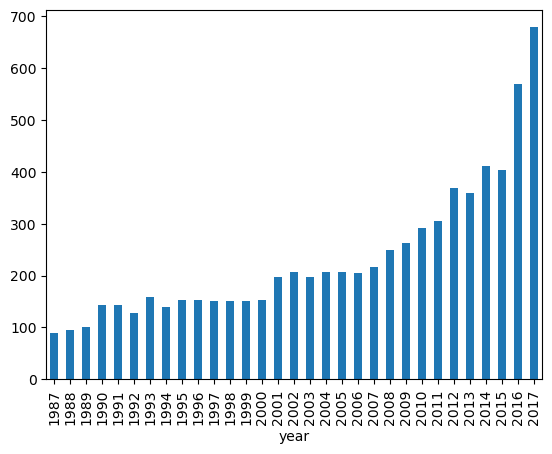

In [6]:
import matplotlib.pyplot as plt
count.plot(kind='bar')

### To identify trends in machine learning research, we start by preprocessing the titles to prepare them for analysis. 
###  We use a regular expression to eliminate any punctuation marks, making the titles more consistent for analysis.

In [7]:
import re
papers['title'].head()

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object

### Lowercasing: To ensure case-insensitive analysis, all titles are converted to lowercase.

In [8]:
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))
papers['title_processed'] = papers['title_processed'].str.lower()
papers['title_processed'].head()

0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object

## Word cloud for visualization of text data

In [19]:
!pip install wordcloud


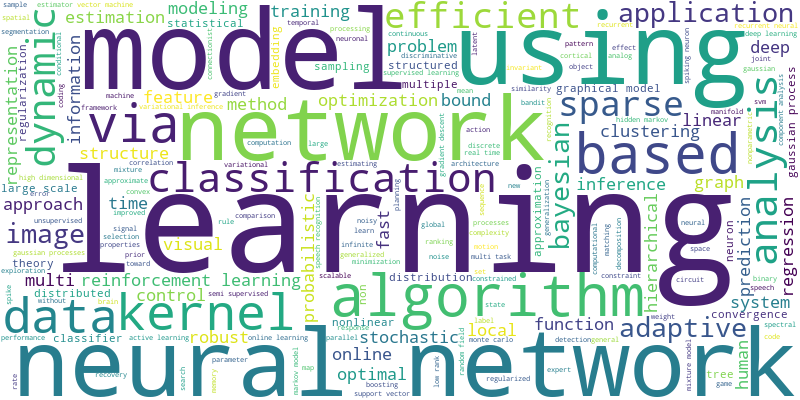

In [20]:
import wordcloud 

long_string = ' '.join(papers['title_processed'])
# creating word cloud
wc = wordcloud.WordCloud(width=800, height=400, background_color='white', colormap='viridis', random_state=42)
wc.generate(long_string)
wc.to_image()

## Analyzing Text Data: Visualizing the 10 Most Common Words

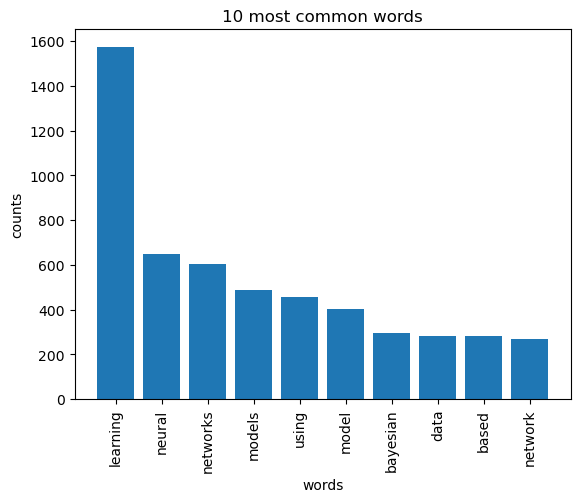

In [23]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## Topic Modeling with LDA: Extracting and Printing Topics

In [25]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        

# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
models sparse dynamic linear data dimensional high graphical bayesian selection

Topic #1:
optimization algorithms convex learning stochastic optimal online search submodular functions

Topic #2:
regression learning based classification vector data kernel machines support analysis

Topic #3:
large information inference scale learning margin models generative variational prediction

Topic #4:
gaussian process processes sampling propagation inference using bayesian mixture variational

Topic #5:
neural networks network using recurrent deep based image recognition learning

Topic #6:
estimation gradient stochastic training adaptive optimization descent algorithms density methods

Topic #7:
model learning neural neurons networks spiking systems memory spike dynamical

Topic #8:
learning multi random using clustering task analysis convergence approximate inference

Topic #9:
learning reinforcement supervised deep unsupervised object efficient active decision

### In this project, we applied Latent Dirichlet Allocation (LDA) for topic modeling on a text dataset. We successfully identified ten distinct topics within the corpus of text, ranging from machine learning algorithms and optimization techniques to neural networks and Bayesian inference. Through this analysis, we gain valuable insights into the underlying themes present in the data. This LDA-based approach proves to be a valuable tool for uncovering and understanding latent structures within textual data, offering a glimpse into the diverse landscape of machine learning research.